##  GDP and Life Expectancy Project

### Introduction
The following project explores the relationship between life expectancy at birth and Gross Domestic Product (GDP) for 6 countries, using data from the World Health Organisation and World Bank.

A study performed in 1975 (and followed up in 2007) by S.H. Preston produced the Preston Curve. The curve indicated that individuals born in wealthy countries can, on average, expect to live longer than those born in poor countries.  However, the curve flattens out, as in areas of high income, an increase in income is not associated with an increase in life expectancy.   GDP is, however, not the only factor that affects life expectancy. Factors such as wealth distribution, healthcare, education and infrastructure also play an important role. 

### Aim and Objectives

The aim of this project is to understand the relationship between GDP and life expectancy for Chile, China, Germany, Mexico, USA and Zimbabwe between 2000 and 2015.  The following objectives were explored:
 - What is the average life expectancy and GDP of a country? How are these distributed?
 - What has been the trend of life expectancy and GDP over the time period?
 - Is there a correlation between GDP and life expectancy?
 
#### Data
 - The data is contained in a CSV file (supplied by Codecademy) with 4 columns: Country, Year, Life expectancy at birth / years and GDP.
 - For each country the average life expectancy and GDP is listed for each year between 2000 and 2015, inclusive.

#### Analysis
 - bar charts for average life expectancy and GDP of each country between 2000 - 2015
 - change in GDP over time 
 - change in life expectancy over time
 - normalised changes in life expectancy and GDP over time for direct comparison

### Results
 - The average life expectancy of USA, China, Chile, Germany and Mexico fall within a small range of 74.3 to 78.9 years and show a similar distribution. Zimbabwe has an average life expectancy of 50.1 years, with a vast growth shown by the large distribution in the violin plot. There are vast differences between the average GDP values, with the USA having the greatest value. The boxplot shows substantial growth for both USA and China, with China having the largest growth in GDP. 
 - Both GDP and life expectancy have an upward trend. Zimbabwe shows the largest increase in life expectancy with a rapid growth from 44.6 to 50.1 year between 2005 and 2015. China and USA show large growths in GDP, with China having an 813% increase. 

### Conclusion
 - There is a strong positive correlation between GDP and life expectancy at birth for the six countries considered - with the assumption there is a linear relationship between the two factors. 
 - The positive trend between life expectancy and GDP is not always evident over shorter time frames as a marked change in GDP did not correspond to a change in life expectancy.  Sometimes an increase in GDP corresponded to a decrease in life expectancy. 
 - The highest GDP does not correspond to the highest life expectancy at birth, as shown by USA which has a very large GDP. 
 - A large increase in GDP does not correlate to a large increase in life expectancy, as in the case of China and Chile both had a large % increase in GDP, which did not correspond to a large increase in life expectancy at birth. 
 
 - Overall there is a positive correlation present between GDP and life expectancy at birth. However, GDP is not likely to be the only factor affecting a country's life expectancy at birth. Other factors which may affect life expectancy at birth are a country's access to education and healthcare, wealth distribution and infrastructure.  All of these play an important role and are related to GDP in some way, indicating GDP has an indirect effect in life expectancy at birth. 
 - At lower GDP an increase in this GDP appears to have a positive affect on life expectancy, as is the case with Zimbabwe.  However, above a certain level, an increase in GDP does not appear to correlate to an increase in life expectancy.  


In [1]:
#Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML

In [2]:
#Import data and tidy up for analysis
df = pd.read_csv(r'C:\Users\Lottes\Desktop\Life-Expectancy-and-GDP-Starter\all_data.csv')

df.rename(columns={'Life expectancy at birth (years)' : 'Life_Expectancy'}, inplace=True)
df.rename(str.lower, axis='columns', inplace=True)
df['country'] = df['country'].replace(['United States of America'],'USA')

#convert GDP into billions of $
df.gdp = df.gdp / 1e9

years= df.year.unique()
chile = df[(df.country == 'Chile')]
china = df[(df.country == 'China')]
germany = df[(df.country == 'Germany')]
mexico = df[(df.country == 'Mexico')]
usa = df[(df.country == 'USA')]
zimbabwe = df[(df.country == 'Zimbabwe')]
country_list = [chile, china, germany, mexico, usa, zimbabwe]


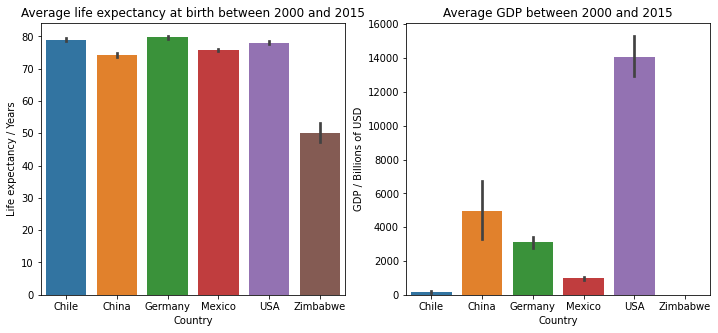

Average Life Expectancy


country
Chile       78.9
China       74.3
Germany     79.7
Mexico      75.7
USA         78.1
Zimbabwe    50.1
Name: life_expectancy, dtype: float64

The average GDP (in billions of US$) for each country
Chile         169.79
China        4957.71
Germany      3094.78
Mexico        976.65
USA         14075.00
Zimbabwe        9.06
Name: gdp, dtype: float64


In [3]:
#average life expectancy and gdp 
#Average life expectancy 
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(12,5))
sns.barplot(data=df, x='country', y='life_expectancy', ax=ax1)
ax1.set_xlabel('Country')
ax1.set_ylabel('Life expectancy / Years')
ax1.set_title('Average life expectancy at birth between 2000 and 2015')
sns.barplot(data=df, x='country', y='gdp', ax=ax2)
ax2.set_xlabel('Country')
ax2.set_ylabel('GDP / Billions of USD')
ax2.set_title('Average GDP between 2000 and 2015')
plt.show()

#numerical values for average life expectancy and gdp
ave_expect=df.life_expectancy.groupby(df.country).mean().round(1)
ave_gdp=df.gdp.groupby(df.country).mean().round(2)

print('Average Life Expectancy')
display(ave_expect)
print('The average GDP (in billions of US$) for each ' + str(ave_gdp))

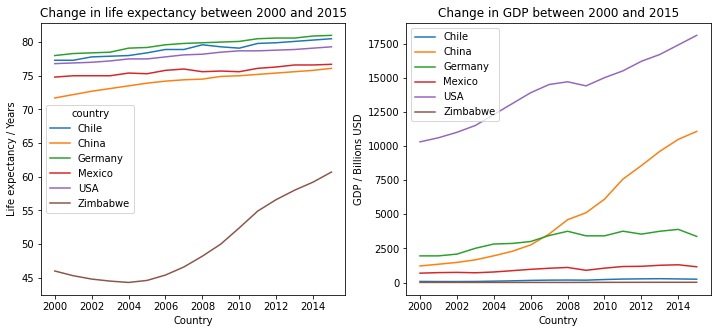

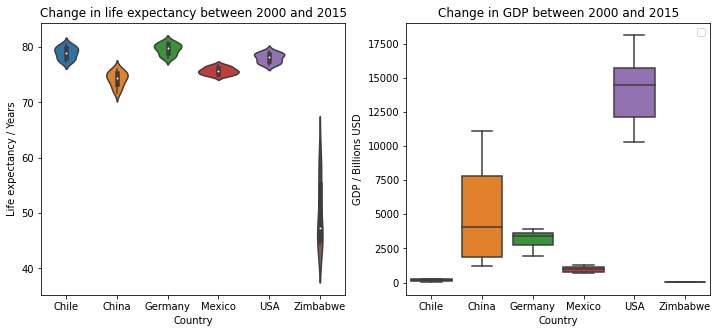

In [4]:
#Change in life expectancy and GDP between 2000 and 2015
#Line plots

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(12,5))
sns.lineplot(data=df, x='year', y='life_expectancy', hue='country', ax=ax1)
ax1.set_xlabel('Country')
ax1.set_ylabel('Life expectancy / Years')
ax1.set_title('Change in life expectancy between 2000 and 2015')
#plt.legend()
sns.lineplot(data=df, x='year', y='gdp', hue='country', ax=ax2)
ax2.set_xlabel('Country')
ax2.set_ylabel('GDP / Billions USD')
ax2.set_title('Change in GDP between 2000 and 2015')
plt.legend(loc=2)
plt.show()

#Violin plot for change in life expectancy
#boxplot for change in GDP

f, (ax3, ax4) = plt.subplots(1,2, sharey=False, figsize=(12,5))
sns.violinplot(data=df, x='country', y='life_expectancy', ax=ax3)
ax3.set_xlabel('Country')
ax3.set_ylabel('Life expectancy / Years')
ax3.set_title('Change in life expectancy between 2000 and 2015')
plt.legend(country_list)
sns.boxplot(data=df, x='country', y='gdp', ax=ax4)
ax4.set_xlabel('Country')
ax4.set_ylabel('GDP / Billions USD')
ax4.set_title('Change in GDP between 2000 and 2015')
plt.show()

Life expectancy at birth between 2000 and 2015


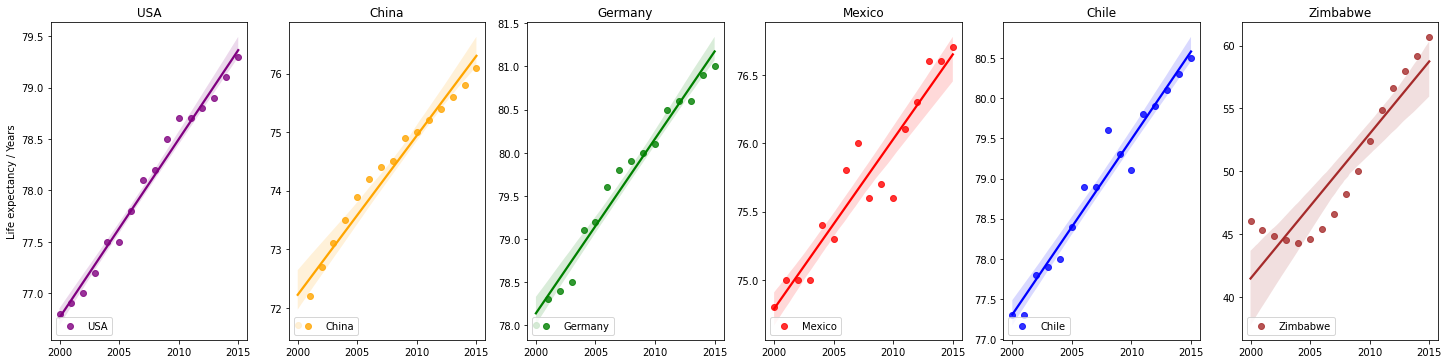

In [14]:
#The large difference between life expectancy in Zimbabwe and the GDP of the USA makes plots harder to read
#Individual plots

#function to plot linear regressions of life expectancy over time for each country:

def make_regplot(data, color, country, xaxis, yaxis, axisno):
    plot = sns.regplot(data=data, x=xaxis, y=yaxis, color=color, ax=axisno)
    axisno.legend([country],loc=3)
    axisno.set_title(country)
    axisno.set_ylabel('')
    axisno.set_xlabel('')
    return plot 


f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=False, figsize=(20,5))
f.tight_layout()
make_regplot(usa, 'purple', 'USA', 'year', 'life_expectancy', ax1)
ax1.set_ylabel('Life expectancy / Years')
make_regplot(china, 'orange', 'China', 'year', 'life_expectancy', ax2)
make_regplot(germany, 'green', 'Germany', 'year', 'life_expectancy', ax3)
make_regplot(mexico, 'red',  'Mexico', 'year', 'life_expectancy', ax4)
make_regplot(chile, 'blue', 'Chile', 'year', 'life_expectancy', ax5)
make_regplot(zimbabwe, 'brown', 'Zimbabwe','year', 'life_expectancy', ax6)
print('Life expectancy at birth between 2000 and 2015')
plt.show()

Change in GDP between 2000 and 2015


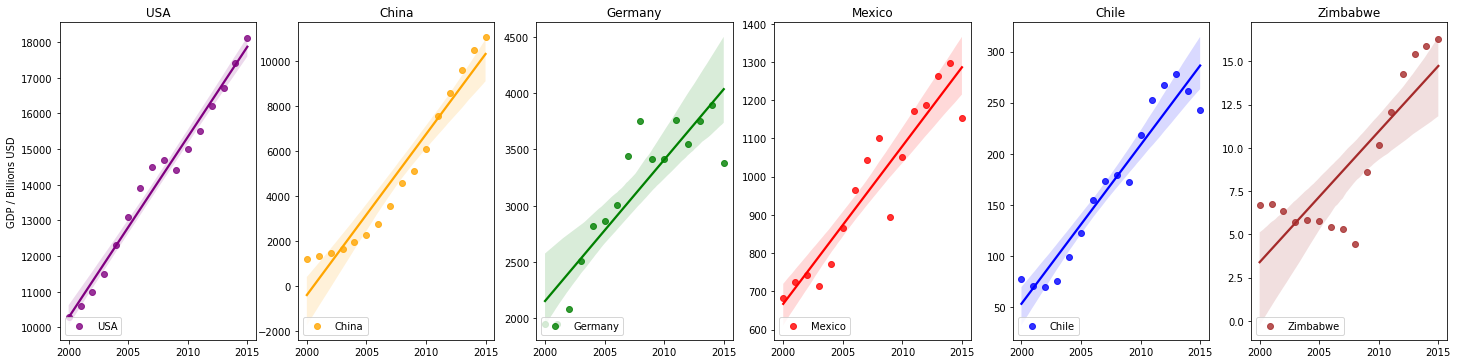

In [13]:
#use make_regplot function to plot linear regressions of GDP over time for each country:

f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=False, figsize=(20,5))
f.tight_layout()
make_regplot(usa, 'purple', 'USA', 'year', 'gdp', ax1)
ax1.set_ylabel('GDP / Billions USD')
make_regplot(china, 'orange', 'China', 'year', 'gdp', ax2)
make_regplot(germany, 'green', 'Germany', 'year', 'gdp', ax3)
make_regplot(mexico, 'red', 'Mexico', 'year', 'gdp', ax4)
make_regplot(chile, 'blue', 'Chile', 'year', 'gdp', ax5)
make_regplot(zimbabwe, 'brown', 'Zimbabwe', 'year', 'gdp', ax6)
print('Change in GDP between 2000 and 2015')
plt.show()

In [7]:
# % change in GDP and life expectancy 
#function to calculate % change 

#for GDP calc colno = 3, for life expectancy calc colno = 2
def perc_change(country_df, colno):
    calc = round(((country_df.iloc[15, colno] - country_df.iloc[0, colno]) / country_df.iloc[0, colno]) *100)
    return calc
countries = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'] 

gdp_change = []
for country in country_list:
    gdp_change.append(perc_change(country, 3))
dictgdp = {'Country': countries, '% change in GDP': gdp_change}
gdpdf = pd.DataFrame(dictgdp)


life_change = []
for country in country_list:
    life_change.append(perc_change(country, 2))
lifegdp = {'Country': countries, '% change in life expectancy': life_change}
lifedf = pd.DataFrame(lifegdp)
display(lifedf, gdpdf)



,Country,% change in life expectancy
0,Chile,4
1,China,6
2,Germany,4
3,Mexico,3
4,USA,3
5,Zimbabwe,32


,Country,% change in GDP
0,Chile,211
1,China,813
2,Germany,73
3,Mexico,69
4,USA,76
5,Zimbabwe,144


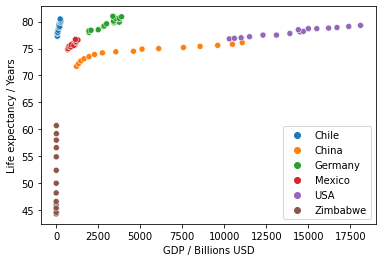

In [8]:
#Correlation between life expectancy and GDP

sns.scatterplot(data=df, y='life_expectancy', x='gdp', hue='country')
plt.xlabel('GDP / Billions USD')
plt.ylabel('Life expectancy / Years')
plt.legend()
plt.show()

In [9]:
#Due to the large differences in GDP and life expectancy the above plot isn't very informative. 
#Normalise the data to do direct comparisons. 


def normalise_func(country_df):
    x = country_df.iloc[:, [2,3]]
    dfx = pd.DataFrame((x-x.min())/ (x.max() - x.min()))
    dfx.rename(columns={'life_expectancy' : 'age_norm', 'gdp' : 'gdp_norm'}, inplace=True)
    new_df = pd.concat([country_df, dfx], axis=1)
    return new_df

norm_chile = normalise_func(chile)
norm_china = normalise_func(china)
norm_germany = normalise_func(germany)
norm_mexico = normalise_func(mexico)
norm_usa = normalise_func(usa)
norm_zimbabwe = normalise_func(zimbabwe)
concat_norm = pd.concat([norm_chile, norm_china, norm_germany, norm_mexico, norm_usa, norm_zimbabwe], axis=0)
#print(norm_germany)
#print(concat_norm)

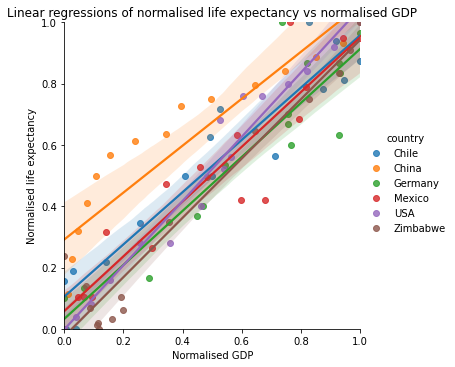

In [10]:
#linear regression plots for normalised life expectancy and normalised gdp
sns.lmplot(data=concat_norm, x='gdp_norm', y='age_norm', hue='country')
plt.xlabel('Normalised GDP')
plt.ylabel('Normalised life expectancy')
plt.title('Linear regressions of normalised life expectancy vs normalised GDP')
#plt.legend()
plt.axis(xmin = 0.0, xmax = 1.0, ymin = 0.0, ymax = 1.0)
plt.show()


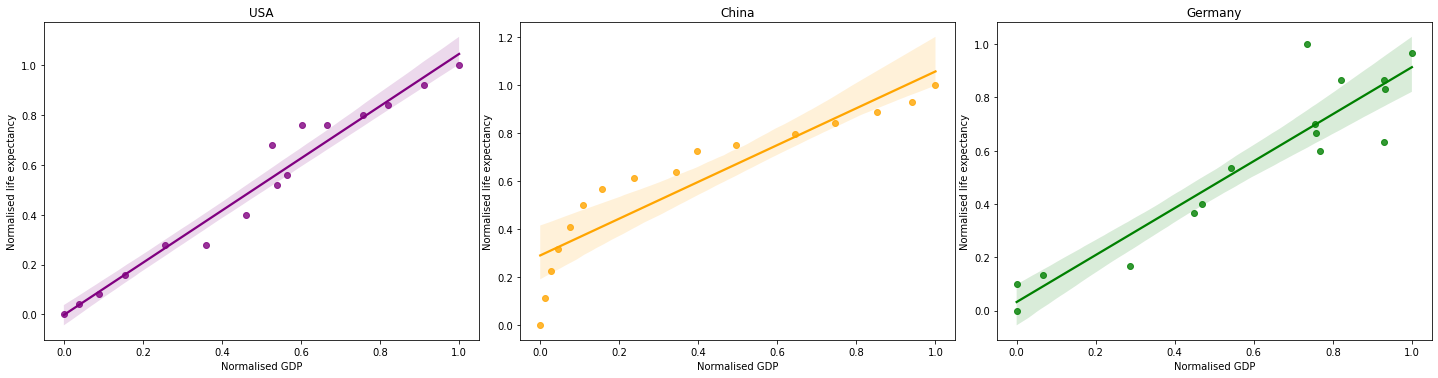

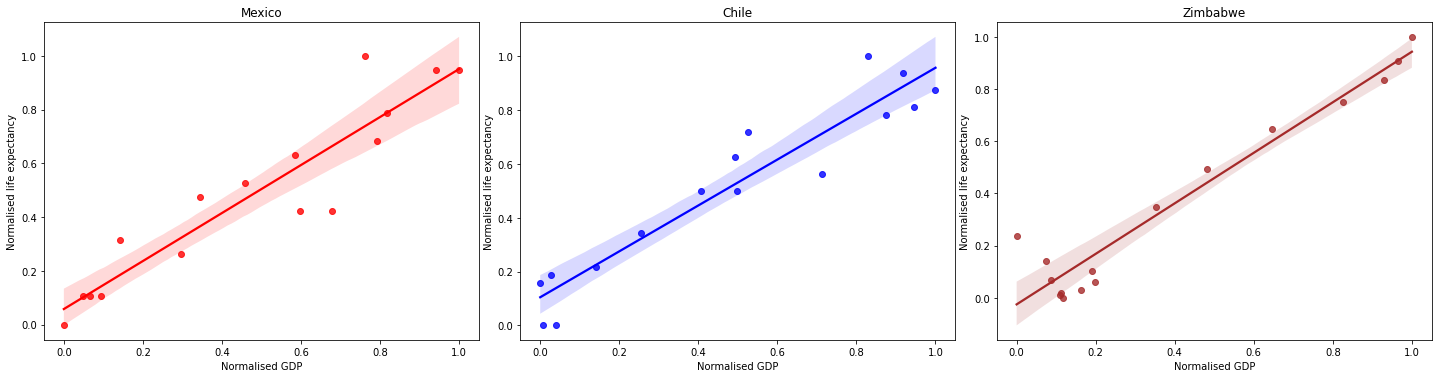

In [11]:
#The above plot is cluttered so individual plots are then produced


def make_regplot_norm(data, color, country, axisno):
    plot = sns.regplot(data=data, x='gdp_norm', y='age_norm', color=color, ax=axisno)
    #axisno.legend([country],loc=3)
    axisno.set_title(country)
    axisno.set_ylabel('Normalised life expectancy')
    axisno.set_xlabel('Normalised GDP')
    return plot 


f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
f.tight_layout()
make_regplot_norm(norm_usa, 'purple', 'USA', ax1)
make_regplot_norm(norm_china, 'orange',  'China', ax2)
make_regplot_norm(norm_germany, 'green',  'Germany', ax3)
plt.show()
f, (ax4, ax5, ax6) = plt.subplots(1, 3, sharey=False, figsize=(20,5))
f.tight_layout()
make_regplot_norm(norm_mexico, 'red',  'Mexico',  ax4)
make_regplot_norm(norm_chile, 'blue', 'Chile', ax5)
make_regplot_norm(norm_zimbabwe, 'brown', 'Zimbabwe', ax6)
plt.show()

### Conclusion
 - There is a strong positive correlation between GDP and life expectancy at birth for the six countries considered - with the assumption there is a linear relationship between the two factors. 
 - The positive trend between life expectancy and GDP is not always evident over shorter time frames as a marked change in GDP did not correspond to a change in life expectancy.  Sometimes an increase in GDP corresponded to a decrease in life expectancy. 
 - The highest GDP does not correspond to the highest life expectancy at birth, as shown by USA which has a very large GDP. 
 - A large increase in GDP does not correlate to a large increase in life expectancy, as in the case of China and Chile both had a large % increase in GDP, which did not correspond to a large increase in life expectancy at birth. 
 
 - Overall there is a positive correlation present between GDP and life expectancy at birth. However, GDP is not likely to be the only factor affecting a country's life expectancy at birth. Other factors which may affect life expectancy at birth are a country's access to education and healthcare, wealth distribution and infrastructure.  All of these play an important role and are related to GDP in some way, indicating GDP has an indirect effect in life expectancy at birth. 
 - At lower GDP an increase in this GDP appears to have a positive affect on life expectancy, as is the case with Zimbabwe.  However, above a certain level, an increase in GDP does not appear to correlate to an increase in life expectancy.  
